## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv(r'C:\Users\k_mah\Documents\miniproject4-master\data\data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df.describe()
#The lowest value I get for Loan_Amount_Term is 12 not 0... That makes sense to me so I'm not sure why the instructions state that the column has 0s instead of nans
# The column has 14 nans, and no 0s.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
# Gender               13
#Let's make this 'unknown' since I don't think gender is going to have a big impact, and if we choose to use any stats we can drop the unknown for that
df['Gender'] = df['Gender'].fillna('Unknown')

# Married               3
# Let's make this 'unknown' as well for the same reasons as gender
df['Married'] = df['Married'].fillna('Unknown')

# Dependents           15
# Let's make this the mode, which in this case is 0
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

# Self_Employed        32
# Let's make this the mode - most people have an employer
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

# LoanAmount           22
# Let's drop these - the loan amount is going to be probably the most important variable. We can drop 22 records out of over 600.
# Also, this amount seems highly dependant on a number of other factors which are not easily approximated by the averages
df = df.dropna(axis=0, subset=['LoanAmount']).reset_index(drop=True)

# Loan_Amount_Term     14
# Let's make this the median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

# Credit_History       50
# 50 null values is a large enough subset to skew our data significantly. But it's also a large enough number that discarding it isn't good either.
# instead, let's try to fill these in proportionally to the data by calculating the frequency of each value and using that.

dist = df['Credit_History'].value_counts(normalize=True)

# Creating a random selector based on the frequencies from value counts
random = np.random.choice(dist.index, p = dist.values)

# Imputing the values
df['Credit_History'].fillna(random, inplace = True)


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

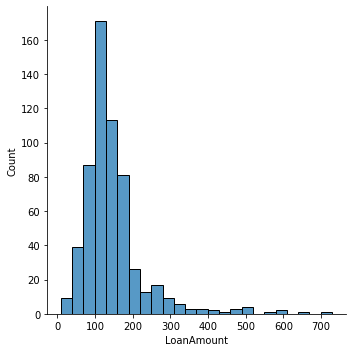

In [31]:
# before the transformation
sns.displot(df, x="LoanAmount", binwidth=30)

In [32]:
df['LoanAmount'] = np.log(df['LoanAmount'])

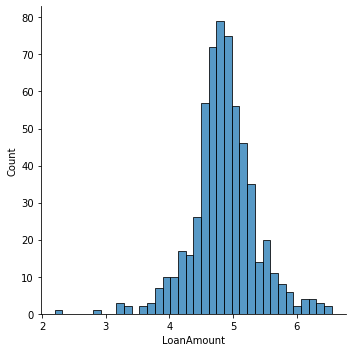

In [33]:
#After the transformation
sns.displot(df, x="LoanAmount")

Combine both incomes as total income and take a log transformation of the same.

In [34]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [35]:
df['total_income'] = np.log(df['total_income'])

In [36]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID'], axis=1)

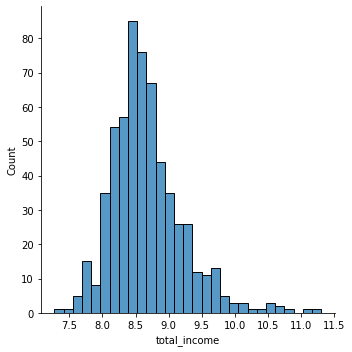

In [37]:
sns.displot(df, x="total_income")

In [38]:
#I'd like to sneak in a column. Loan as a proportion of income.
df['LoanRatio'] = df['LoanAmount'] / df['total_income']

In [40]:
df.to_csv(r'C:\Users\k_mah\Documents\miniproject4-master\data\cleanloans.csv')

In [39]:
df['LoanRatio']
#Future Kinza here. This was a very good idea. It numped results by 5% accross the board

0      0.556772
1      0.523290
2      0.562882
3      0.568855
4      0.609239
         ...   
587    0.534675
588    0.443364
589    0.613087
590    0.585550
591    0.580105
Name: LoanRatio, Length: 592, dtype: float64